## iFood CRM Case

Guilherme Lupatelli <br>
guilherme.lupatelli@gmail.com <br>
https://www.linkedin.com/in/guilherme-lupatelli-520654b9/ <br>
Feb 2022

### The Company

1. Retail food sector <br>
<br>
2. Selling products from 5 major categories divided into gold and regular products: <br>
<br>
   A. Wines <br>
   B. Rare meat products <br>
   C. Exotic fruits <br>
   D. Specially prepared fish <br>
   E. Sweet products <br>
<br>
3. Three different sales channels: <br>
<br>
   A. Stores <br>
   B. Catalogs <br>
   C. Online <br>
<br>

#### PROBLEM:
Profit growth perspectives for the next 3 years are NOT promising <br><br>
**OBJECTIVE: Improve Marketing Performance, focusing on Marketing Campaigns** <br>
- To do that:

 1. Get the characteristic features of customers who are willing to buy the new gadget;
 2. Build predictive model that will support direct Marketing initiatives, producing the highest profit for the next Marketing Campaigns.
 
**Dataset:**
- Next Campaign (Campaign 6 - 'Response') aims to sell a new gadget
- Pilot Campaign a total of 2240 customers randomly selected and contacted by phone regarding the acquisition of the new gadget.
- Dataset contains socio-demographic and firmographic features about the 2240 customers contacted by phone.

**Case resolution steps:**
 1. Data Prep + EDA (see attached files in R)
 2. Predictive model

In [1]:
#data manipulation
import numpy as np
import pandas as pd
import datetime

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')

#data preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

#ML Modules
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.cluster import KMeans

#metrics
from sklearn.metrics import (
    log_loss,
    roc_auc_score,
    roc_curve,
    auc,
    precision_recall_curve,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score    
)
from scikitplot.metrics import plot_ks_statistic

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1.1) Data Preparation

- The first thing to do is to analyze what kind of information the dataset has and to understand if it is necessary to make any data manipulation.

In [2]:
#Loading and checking the dataset

df = pd.read_excel('iFood1.xlsx')
print(df.shape)
df.head(10)

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [3]:
#Checking unique columns

print(np.unique(df['Z_Revenue']), np.unique(df['Z_CostContact']))

[11] [3]


- Columns 'Z_CostContact' and 'Z_Revenue' have just one unique value and they represent the cost per contact and the revenue when the customer accepted the campaign. Total cost was 6.720MU and the revenue was 3.674MU, totalizing a loss of -3.046MU.
- These columns will be dropped since they will not be valuable for the model neither for data analysis

In [4]:
#Dropping unique columns

df = df.drop(columns=['Z_Revenue','Z_CostContact'])

In [5]:
#Checking stats

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [6]:
#Checking null values

df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

The first thing we can notice is 24 customer that doesn't have Income information and it represents 1% of the sample. One of the approaches is to exclude the rows, or to use the median and the mean or to develop a model to predict the income. In this case, since the percentage is low, it's enough to exclude all the rows where income is null.

In [7]:
#Dropping null rows

df.dropna(subset = ["Income"], inplace=True)

In [8]:
#Checking

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

## Numerical Features

- Income
- Kidhome
- Teenhome
- Recency
- MntWines      
- MntFruits       
- MntMeatProducts        
- MntFishProducts        
- MntSweetProducts         
- MntGoldProds       
- NumDealsPurchases        
- NumWebPurchases        
- NumCatalogPurchases        
- NumStorePurchases        
- NumWebVisitsMonth         
- AcceptedCmp3        
- AcceptedCmp4         
- AcceptedCmp5         
- AcceptedCmp1         
- AcceptedCmp2         
- Complain

## Categorical Features

- Education
- Marital_Status

## Date

- Year_Birth (we are going to create an age feature)
- Dt_Customer (we are going to create a subscription time for each client)

## Target Feature

- Response (target)

# 1.2 Feature Creation

- Creating a few variables as the age and subscription time as well as tranforming categoric features (classes) into numeric values to be easily added while using the algorithims

In [9]:
#getting the age of customers (considering the current year as 2020)

def age(YOB):
    
    YOB = int(YOB)
    current_year = 2020
    
    if YOB <= 2020:
        age = current_year - YOB
    
    return age

In [10]:
#creating a column containing age (in years) of customers

df['age'] = df['Year_Birth'].apply(age)

In [11]:
#number of months since the customer enrolled (considering the current date as the last update on the read me file provided)

def totalMonths(enrollDt):
    current_date = datetime.datetime(2020,2,19)
    month = enrollDt.month
    day = enrollDt.day
    year = enrollDt.year
    enroll_date = datetime.datetime(year,month,day)
    
    num_months =(current_date.year - enroll_date.year) * 12 + (current_date.month - enroll_date.month)
    
    return num_months

In [12]:
#creating a column with number of total months since the customer enrolled

df['enrolled_months'] = df['Dt_Customer'].apply(totalMonths)

In [13]:
#creating a column Children Number (number of children: kids+teens)

df['children_number'] = df[['Kidhome','Teenhome']].sum(axis=1)

In [14]:
#creating a column Total Purchases with the total number of purchases by user

df['total_purchases'] = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis=1)

In [15]:
#creating a column Total Spent per user with the total amount spent on each product during the last 2 years

df['total_spent'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts']].sum(axis=1)

In [16]:
#creating a column with the number of total campaigns accepted (1 to 5) for each customer

df['total_campaigns'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)

In [17]:
#defining the amount spent per purchase for each customer

def spendPurchase(s,p):
    
    sp = 0
    
    if s == 0 or p == 0:
        return sp
    else:
        sp = round((s/p),2)
        return sp

In [18]:
#getting the percentage value of a feature

def percentage(n, t):
    
    perc = 0
    
    if n == 0 or t == 0:
        return perc
    
    else:
        perc = round((n * 100)/t,2)
        return perc

In [19]:
#creating a column with the amount spent per purchase for each customer

df['spent_per_purchase'] = df.apply(lambda row: spendPurchase(row['total_spent'], row['total_purchases']),axis=1)

In [20]:
#Percentage of money spend on each product

df['wines_perc'] = df.apply(lambda row: percentage(row['MntWines'], row['total_spent']),axis=1)
df['meat_perc'] = df.apply(lambda row: percentage(row['MntMeatProducts'], row['total_spent']),axis=1)
df['fish_perc'] = df.apply(lambda row: percentage(row['MntFishProducts'], row['total_spent']),axis=1)
df['sweet_perc'] = df.apply(lambda row: percentage(row['MntSweetProducts'], row['total_spent']),axis=1)
df['fruits_perc'] = df.apply(lambda row: percentage(row['MntFruits'], row['total_spent']),axis=1)

In [21]:
#Percentage of purchases on each channel

df['store_perc'] = df.apply(lambda row: percentage(row['NumStorePurchases'], row['total_purchases']),axis=1)
df['web_perc'] = df.apply(lambda row: percentage(row['NumWebPurchases'], row['total_purchases']),axis=1)
df['catalog_perc'] = df.apply(lambda row: percentage(row['NumCatalogPurchases'], row['total_purchases']),axis=1)

In [22]:
#Checking education unique values

df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [23]:
#Checking marital status unique values

df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [24]:
#Checking education unique %

df['Education'].value_counts()/df.shape[0]

Graduation    0.503610
PhD           0.217058
Master        0.164711
2n Cycle      0.090253
Basic         0.024368
Name: Education, dtype: float64

In [25]:
#Checking marital status unique %

df['Marital_Status'].value_counts()/df.shape[0]

Married     0.386733
Together    0.258574
Single      0.212545
Divorced    0.104693
Widow       0.034296
Alone       0.001354
Absurd      0.000903
YOLO        0.000903
Name: Marital_Status, dtype: float64

In [26]:
#Creating a new variable 'Others' for the categorical feature that represents less than 5% on the distribution

def other_group(df, columns = ['Education', 'Marital_Status'], num = 0.05):
    
    for i in range(0, len(columns)):
        
        dict_aux = dict(df[columns[i]].value_counts()/df.shape[0])
        df[columns[i]] = ['Others' if dict_aux[i] <= num else i for i in df[columns[i]]]
        
    return df

In [27]:
#Applying other_group function

df = other_group(df)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,enrolled_months,children_number,total_purchases,total_spent,total_campaigns,spent_per_purchase,wines_perc,meat_perc,fish_perc,sweet_perc,fruits_perc,store_perc,web_perc,catalog_perc
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,89,0,22,1529,0,69.50,41.53,35.71,11.25,5.76,5.76,18.18,36.36,45.45
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,71,2,4,21,0,5.25,52.38,28.57,9.52,4.76,4.76,50.00,25.00,25.00
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,78,0,20,734,0,36.70,58.04,17.30,15.12,2.86,6.68,50.00,40.00,10.00
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,72,1,6,48,0,8.00,22.92,41.67,20.83,6.25,8.33,66.67,33.33,0.00
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,73,1,14,407,0,29.07,42.51,28.99,11.30,6.63,10.57,42.86,35.71,21.43


In [28]:
#Checking marital status

df.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Others       83
Name: Marital_Status, dtype: int64

In [29]:
#Checking education

df.Education.value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Others          54
Name: Education, dtype: int64

- Now we are going to do a trick for the class features. We are going to give a number for each class, given its probability of offer acceptance in the last campaign.

In [30]:
marital_status_ordinary = pd.crosstab(df.Marital_Status, df.Response).apply(lambda row: row/row.sum(), axis=1)
print(marital_status_ordinary)
marital_status_ordinary = marital_status_ordinary.reset_index()
print(marital_status_ordinary)
marital_status_ordinary = marital_status_ordinary.rename_axis(index=None, columns=None)
print(marital_status_ordinary)
marital_status_ordinary = marital_status_ordinary.rename(columns={0:"response_0", 1:"response_1"})
print(marital_status_ordinary)
marital_status_ordinary = marital_status_ordinary.sort_values(by=["response_1"])
print(marital_status_ordinary)
distinct_marital_status_ordinary = [x for x in marital_status_ordinary.Marital_Status.unique()]
print(distinct_marital_status_ordinary)
marital_status_ordinary_domain = dict(zip(distinct_marital_status_ordinary, range(0,len(distinct_marital_status_ordinary))))
print(marital_status_ordinary_domain)
marital_status_ordinary['marital_status_ordinary_domain'] = marital_status_ordinary.Marital_Status.map(lambda x : marital_status_ordinary_domain[x])
print(marital_status_ordinary)
marital_status_ordinary = marital_status_ordinary[['Marital_Status', 'marital_status_ordinary_domain']]
print(marital_status_ordinary)
df = df.merge(marital_status_ordinary, on = ['Marital_Status'], how = 'left')
print(marital_status_ordinary_domain)
df.head()

Response               0         1
Marital_Status                    
Divorced        0.793103  0.206897
Married         0.885648  0.114352
Others          0.746988  0.253012
Single          0.774947  0.225053
Together        0.895288  0.104712
Response Marital_Status         0         1
0              Divorced  0.793103  0.206897
1               Married  0.885648  0.114352
2                Others  0.746988  0.253012
3                Single  0.774947  0.225053
4              Together  0.895288  0.104712
  Marital_Status         0         1
0       Divorced  0.793103  0.206897
1        Married  0.885648  0.114352
2         Others  0.746988  0.253012
3         Single  0.774947  0.225053
4       Together  0.895288  0.104712
  Marital_Status  response_0  response_1
0       Divorced    0.793103    0.206897
1        Married    0.885648    0.114352
2         Others    0.746988    0.253012
3         Single    0.774947    0.225053
4       Together    0.895288    0.104712
  Marital_Status  respo

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,enrolled_months,children_number,total_purchases,total_spent,total_campaigns,spent_per_purchase,wines_perc,meat_perc,fish_perc,sweet_perc,fruits_perc,store_perc,web_perc,catalog_perc,marital_status_ordinary_domain
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,89,0,22,1529,0,69.50,41.53,35.71,11.25,5.76,5.76,18.18,36.36,45.45,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,71,2,4,21,0,5.25,52.38,28.57,9.52,4.76,4.76,50.00,25.00,25.00,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,78,0,20,734,0,36.70,58.04,17.30,15.12,2.86,6.68,50.00,40.00,10.00,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,72,1,6,48,0,8.00,22.92,41.67,20.83,6.25,8.33,66.67,33.33,0.00,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,73,1,14,407,0,29.07,42.51,28.99,11.30,6.63,10.57,42.86,35.71,21.43,1


In [31]:
education_ordinary = pd.crosstab(df.Education, df.Response).apply(lambda row: row/row.sum(), axis=1)
print(education_ordinary)
education_ordinary = education_ordinary.reset_index()
education_ordinary = education_ordinary.rename_axis(index=None, columns=None)
education_ordinary = education_ordinary.rename(columns={0:"response_0", 1:"response_1"})
education_ordinary = education_ordinary.sort_values(by=["response_1"])
distinct_education_ordinary = [x for x in education_ordinary.Education.unique()]
education_ordinary_domain = dict(zip(distinct_education_ordinary, range(0,len(distinct_education_ordinary))))
education_ordinary['education_ordinary_domain'] = education_ordinary.Education.map(lambda x : education_ordinary_domain[x])
education_ordinary = education_ordinary[['Education', 'education_ordinary_domain']]
print(education_ordinary)
df = df.merge(education_ordinary, on = ['Education'], how = 'left')
print(education_ordinary_domain)
df.head()

Response           0         1
Education                     
2n Cycle    0.890000  0.110000
Graduation  0.863799  0.136201
Master      0.846575  0.153425
Others      0.962963  0.037037
PhD         0.790021  0.209979
    Education  education_ordinary_domain
3      Others                          0
0    2n Cycle                          1
1  Graduation                          2
2      Master                          3
4         PhD                          4
{'Others': 0, '2n Cycle': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,enrolled_months,children_number,total_purchases,total_spent,total_campaigns,spent_per_purchase,wines_perc,meat_perc,fish_perc,sweet_perc,fruits_perc,store_perc,web_perc,catalog_perc,marital_status_ordinary_domain,education_ordinary_domain
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,89,0,22,1529,0,69.50,41.53,35.71,11.25,5.76,5.76,18.18,36.36,45.45,3,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,71,2,4,21,0,5.25,52.38,28.57,9.52,4.76,4.76,50.00,25.00,25.00,3,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,78,0,20,734,0,36.70,58.04,17.30,15.12,2.86,6.68,50.00,40.00,10.00,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,72,1,6,48,0,8.00,22.92,41.67,20.83,6.25,8.33,66.67,33.33,0.00,0,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,73,1,14,407,0,29.07,42.51,28.99,11.30,6.63,10.57,42.86,35.71,21.43,1,4


In [32]:
#Organizing the dataset

customers = df.filter([
       'Income',
       'enrolled_months',
       'education_ordinary_domain', 'marital_status_ordinary_domain',
       'age',
       'Kidhome', 'Teenhome', 'children_number',
       'Recency',
       'MntWines', 'wines_perc', 'MntFruits', 'fruits_perc', 'MntMeatProducts', 'meat_perc', 'MntFishProducts', 'fish_perc',
       'MntSweetProducts', 'sweet_perc', 'MntGoldProds', 'total_spent',   
       'NumDealsPurchases', 'NumWebPurchases', 'web_perc', 'NumCatalogPurchases', 'catalog_perc', 'NumStorePurchases', 'store_perc',
       'total_purchases',
       'spent_per_purchase',
       'NumWebVisitsMonth',
       'Complain',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'total_campaigns',
       'Response'], axis=1)

- EDA will be done in R (please see attached EDA.R file) and for feature importance I've used Boruta, also in R (please see attached Boruta.R file)

In [33]:
df_eda = customers.copy()
df_eda.to_csv('df_eda.csv')
df_eda.head()

,Income,enrolled_months,education_ordinary_domain,marital_status_ordinary_domain,age,Kidhome,Teenhome,children_number,Recency,MntWines,wines_perc,MntFruits,fruits_perc,MntMeatProducts,meat_perc,MntFishProducts,fish_perc,MntSweetProducts,sweet_perc,MntGoldProds,total_spent,NumDealsPurchases,NumWebPurchases,web_perc,NumCatalogPurchases,catalog_perc,NumStorePurchases,store_perc,total_purchases,spent_per_purchase,NumWebVisitsMonth,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,total_campaigns,Response
0,58138.0,89,2,3,63,0,0,0,58,635,41.53,88,5.76,546,35.71,172,11.25,88,5.76,88,1529,3,8,36.36,10,45.45,4,18.18,22,69.50,7,0,0,0,0,0,0,0,1
1,46344.0,71,2,3,66,1,1,2,38,11,52.38,1,4.76,6,28.57,2,9.52,1,4.76,6,21,2,1,25.00,1,25.00,2,50.00,4,5.25,5,0,0,0,0,0,0,0,0
2,71613.0,78,2,0,55,0,0,0,26,426,58.04,49,6.68,127,17.30,111,15.12,21,2.86,42,734,1,8,40.00,2,10.00,10,50.00,20,36.70,4,0,0,0,0,0,0,0,0
3,26646.0,72,2,0,36,1,0,1,26,11,22.92,4,8.33,20,41.67,10,20.83,3,6.25,5,48,2,2,33.33,0,0.00,4,66.67,6,8.00,6,0,0,0,0,0,0,0,0
4,58293.0,73,4,1,39,1,0,1,94,173,42.51,43,10.57,118,28.99,46,11.30,27,6.63,15,407,5,5,35.71,3,21.43,6,42.86,14,29.07,5,0,0,0,0,0,0,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2215
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2216 non-null   int64         
 1   Year_Birth                      2216 non-null   int64         
 2   Education                       2216 non-null   object        
 3   Marital_Status                  2216 non-null   object        
 4   Income                          2216 non-null   float64       
 5   Kidhome                         2216 non-null   int64         
 6   Teenhome                        2216 non-null   int64         
 7   Dt_Customer                     2216 non-null   datetime64[ns]
 8   Recency                         2216 non-null   int64         
 9   MntWines                        2216 non-null   int64         
 10  MntFruits                       2216 non-null   int64         
 11  MntM

- Getting results from EDA done in R with p-values from chi-square tests

In [35]:
df_chisquare = pd.read_csv('df_chisquare.csv')
df_chisquare.sort_values(by='p-value').head(50)

,Unnamed: 0,feature,p-value
32,33,total_campaigns,1.924858e-86
37,39,AcceptedCmp5,2.502537e-52
33,34,AcceptedCmp1,1.618420e-44
27,28,store_perc,9.691091e-37
20,21,total_spent,1.063761e-33
35,37,AcceptedCmp3,5.958672e-33
29,30,spent_per_purchase,1.891333e-30
13,14,MntMeatProducts,9.928673e-29
25,26,catalog_perc,1.486554e-28
9,10,MntWines,1.580478e-28


- Getting each feature importance from Boruta analysis

In [36]:
df_importance = pd.read_csv('df_importance.csv')
df_importance = df_importance.rename(columns={"features": "feature"})

In [37]:
df_importance = df_importance[['feature', 'decision', 'normHits', 'meanImp']]

In [38]:
df_merge = df_importance.merge(df_chisquare, how='inner', on='feature').sort_values(by='meanImp', ascending=False)
df_merge.head(50)

,feature,decision,normHits,meanImp,Unnamed: 0,p-value
0,total_campaigns,Confirmed,1.000000,23.527978,33,1.924858e-86
1,Recency,Confirmed,1.000000,21.979354,9,1.026094e-18
2,store_perc,Confirmed,1.000000,15.585097,28,9.691091e-37
3,AcceptedCmp3,Confirmed,1.000000,15.167607,37,5.958672e-33
4,enrolled_months,Confirmed,1.000000,14.762772,2,1.507709e-18
5,total_spent,Confirmed,1.000000,12.965418,21,1.063761e-33
6,Income,Confirmed,1.000000,12.873125,1,7.068135e-24
7,MntMeatProducts,Confirmed,1.000000,12.866881,14,9.928673e-29
8,catalog_perc,Confirmed,1.000000,12.841634,26,1.486554e-28
9,MntWines,Confirmed,1.000000,12.648707,10,1.580478e-28


- We are going to reject everything with importance (meanImp) under 6 and also with high p-value on the chi-square test above 0.05.

In [39]:
customers_merge = df.filter([
       'Income',
       'enrolled_months',
       'education_ordinary_domain', 'marital_status_ordinary_domain',
       'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'meat_perc',
       'MntGoldProds', 'total_spent',   
       'NumWebPurchases', 'web_perc', 'NumCatalogPurchases', 'catalog_perc', 'NumStorePurchases', 'store_perc',
       'total_purchases',
       'spent_per_purchase',
       'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp5', 'total_campaigns',
       'Response'], axis=1)

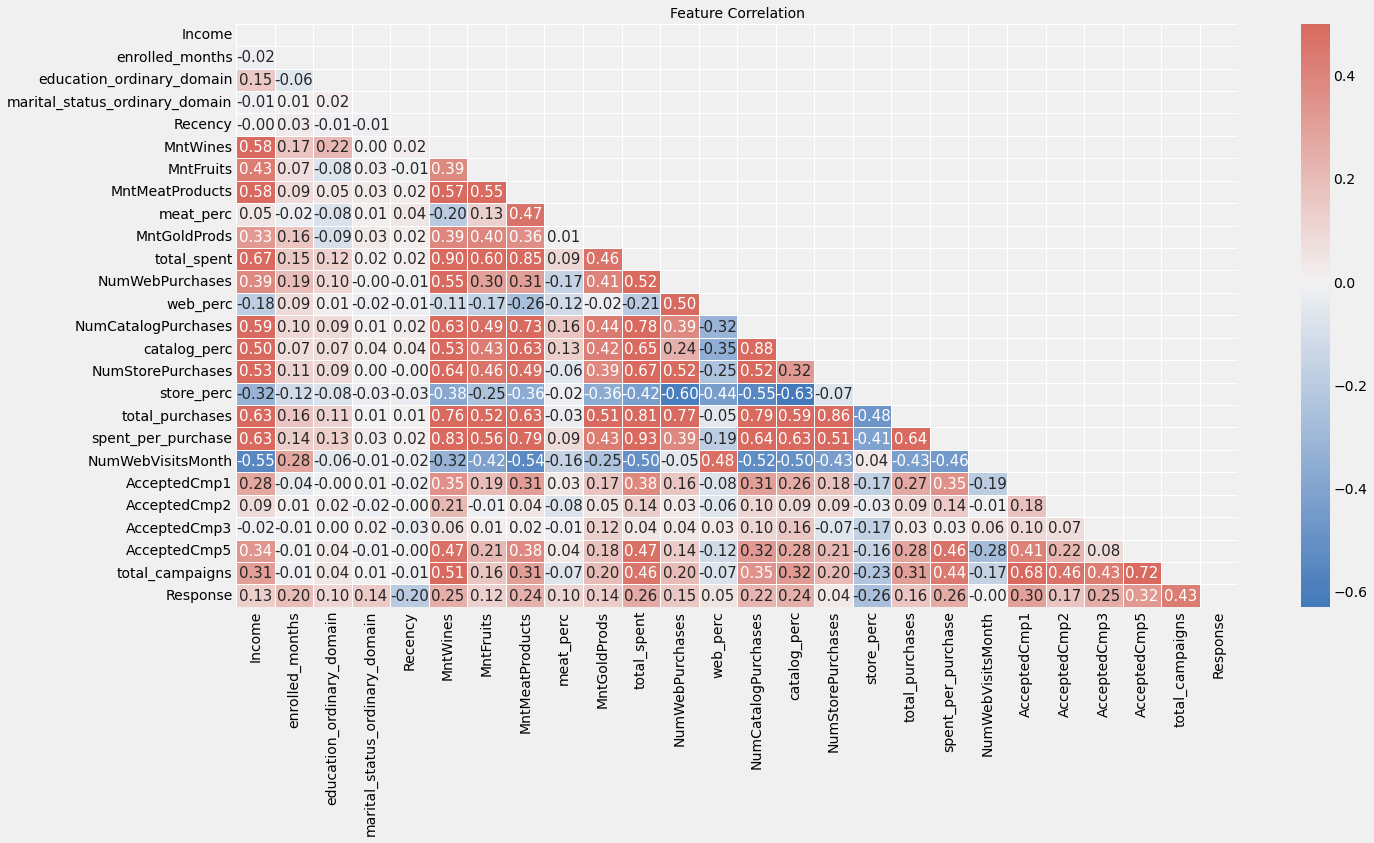

In [40]:
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')

corrmat = customers_merge.corr()

fig, ax = plt.subplots()

mask = np.triu(np.ones_like(corrmat, dtype=bool))

cmap = sns.diverging_palette(250, 15, as_cmap=True)

sns.heatmap(corrmat, annot=True, annot_kws={"size": 15},
           fmt="0.2f", mask=mask, cmap=cmap, vmax=.5, center=0,
           square=False, linewidths=.5, cbar_kws={"shrink": 1})

ax.set_title('Feature Correlation', fontsize=14, color='black');

In [41]:
customers_merge_final = df.filter([
       'enrolled_months',
       'Recency',
       'meat_perc', 'MntFishProducts',
       'MntGoldProds', 'total_spent',   
       'NumCatalogPurchases', 'NumStorePurchases', 'store_perc',
       'NumWebVisitsMonth',
       'AcceptedCmp2', 'AcceptedCmp3', 'total_campaigns',
       'Response'], axis=1)

In [42]:
y = customers_merge_final['Response']
X = customers_merge_final.drop(columns = 'Response').values

In [43]:
X

array([[89.  , 58.  , 35.71, ...,  0.  ,  0.  ,  0.  ],
       [71.  , 38.  , 28.57, ...,  0.  ,  0.  ,  0.  ],
       [78.  , 26.  , 17.3 , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [73.  , 91.  , 17.83, ...,  0.  ,  0.  ,  1.  ],
       [73.  ,  8.  , 27.37, ...,  0.  ,  0.  ,  0.  ],
       [88.  , 40.  , 40.4 , ...,  0.  ,  0.  ,  0.  ]])

## Class Weight and Split

In [44]:
c = customers_merge_final['Response'].value_counts()
c

0    1883
1     333
Name: Response, dtype: int64

In [45]:
# class weight function
def wts(y):
    c0, c1 = np.bincount(y)
    w0 = (1/c0)*(len(y))/2
    w1 = (1/c1)*(len(y))/2
    return {0: w0, 1: w1}

In [46]:
class_weight = wts(y)
class_weight

{0: 0.5884227296866702, 1: 3.3273273273273274}

In [47]:
class_weight[0]*c[0], class_weight[1]*c[1]

(1108.0, 1108.0)

In [49]:
# Splitting the datasets into training and testing data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

### Model (RandomForest)

In [50]:
class_weight

{0: 0.5884227296866702, 1: 3.3273273273273274}

In [51]:
customers_merge_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2215
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   enrolled_months      2216 non-null   int64  
 1   Recency              2216 non-null   int64  
 2   meat_perc            2216 non-null   float64
 3   MntFishProducts      2216 non-null   int64  
 4   MntGoldProds         2216 non-null   int64  
 5   total_spent          2216 non-null   int64  
 6   NumCatalogPurchases  2216 non-null   int64  
 7   NumStorePurchases    2216 non-null   int64  
 8   store_perc           2216 non-null   float64
 9   NumWebVisitsMonth    2216 non-null   int64  
 10  AcceptedCmp2         2216 non-null   int64  
 11  AcceptedCmp3         2216 non-null   int64  
 12  total_campaigns      2216 non-null   int64  
 13  Response             2216 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 259.7 KB


In [52]:
rfc_param_grid = {
    "n_estimators": [200, 300, 400],
    "max_features": ["sqrt", "log2"],
    "max_depth": [4, 5, 6, 7, 8],
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": [10, 20, 30, 40]    
}

In [54]:
rfc = RandomForestClassifier(random_state=1, class_weight=class_weight, n_jobs=-1)

cv_rfc = RandomizedSearchCV(
    estimator=rfc, param_distributions=rfc_param_grid, cv=3, scoring="roc_auc", n_iter=50)
cv_rfc.fit(X_train, y_train)

print(log_loss(y_train, cv_rfc.predict_proba(X_train)))
print(log_loss(y_test, cv_rfc.predict_proba(X_test)))

0.3022719136096606
0.3641159404097345


In [55]:
model = cv_rfc

In [56]:
# Threshold = 0,5
y_pred_tr = model.predict_proba(X_train)[:,1]
y_class_tr = [1 if y >= 0.5 else 0 for y in y_pred_tr]

from sklearn.metrics import confusion_matrix

print("Acc:", accuracy_score(y_train, y_class_tr))
print("Prec:", precision_score(y_train, y_class_tr))
print("Rec:", recall_score(y_train, y_class_tr))
print()

cm_tr = confusion_matrix(y_train, y_class_tr)
print(cm_tr)


Acc: 0.8961960025789814
Prec: 0.5971014492753624
Rec: 0.9035087719298246

[[1184  139]
 [  22  206]]


In [57]:
# Threshold = 0,5
y_pred_ts = model.predict_proba(X_test)[:,1]
y_class_ts = [1 if y >= 0.5 else 0 for y in y_pred_ts]

from sklearn.metrics import confusion_matrix

print("Acc:", accuracy_score(y_test, y_class_ts))
print("Prec:", precision_score(y_test, y_class_ts))
print("Rec:", recall_score(y_test, y_class_ts))
print()

cm_ts = confusion_matrix(y_test, y_class_ts)
print(cm_ts)


Acc: 0.8451127819548873
Prec: 0.5064102564102564
Rec: 0.7523809523809524

[[483  77]
 [ 26  79]]


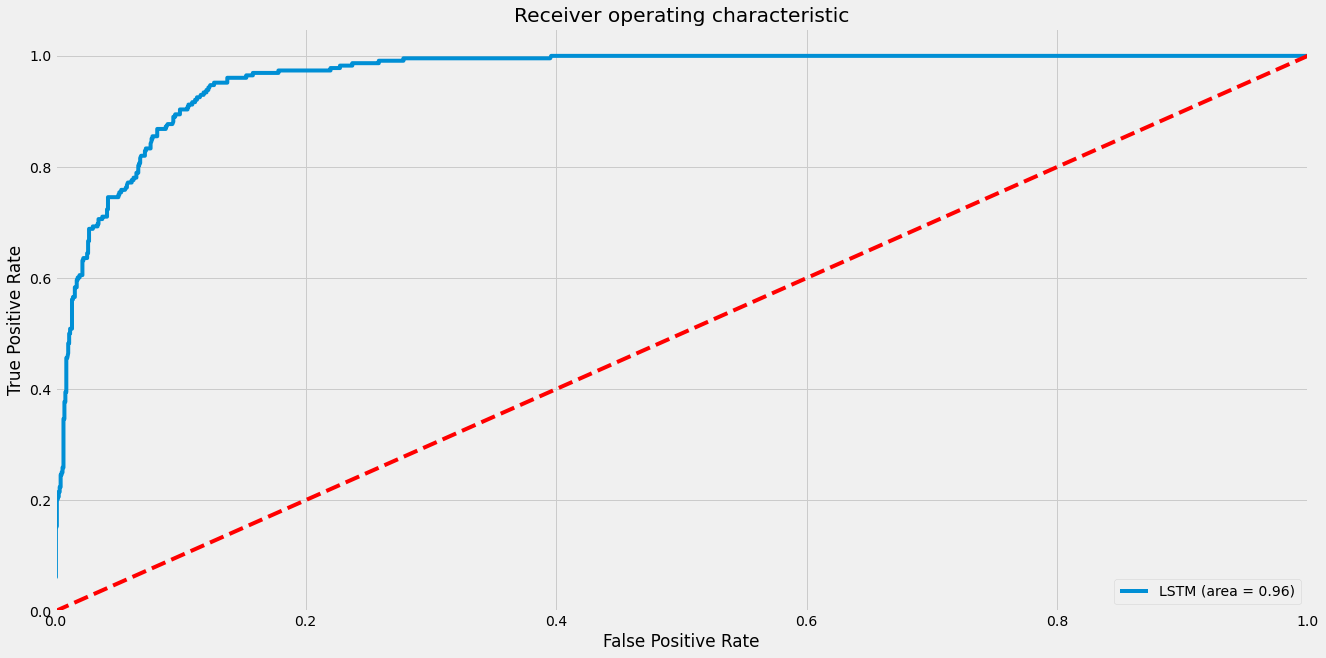

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

nn_roc_auc = roc_auc_score(y_train, y_pred_tr)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_tr)
plt.figure()
plt.title("Train")
plt.plot(fpr, tpr, label="LSTM (area = %0.2f)" % nn_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

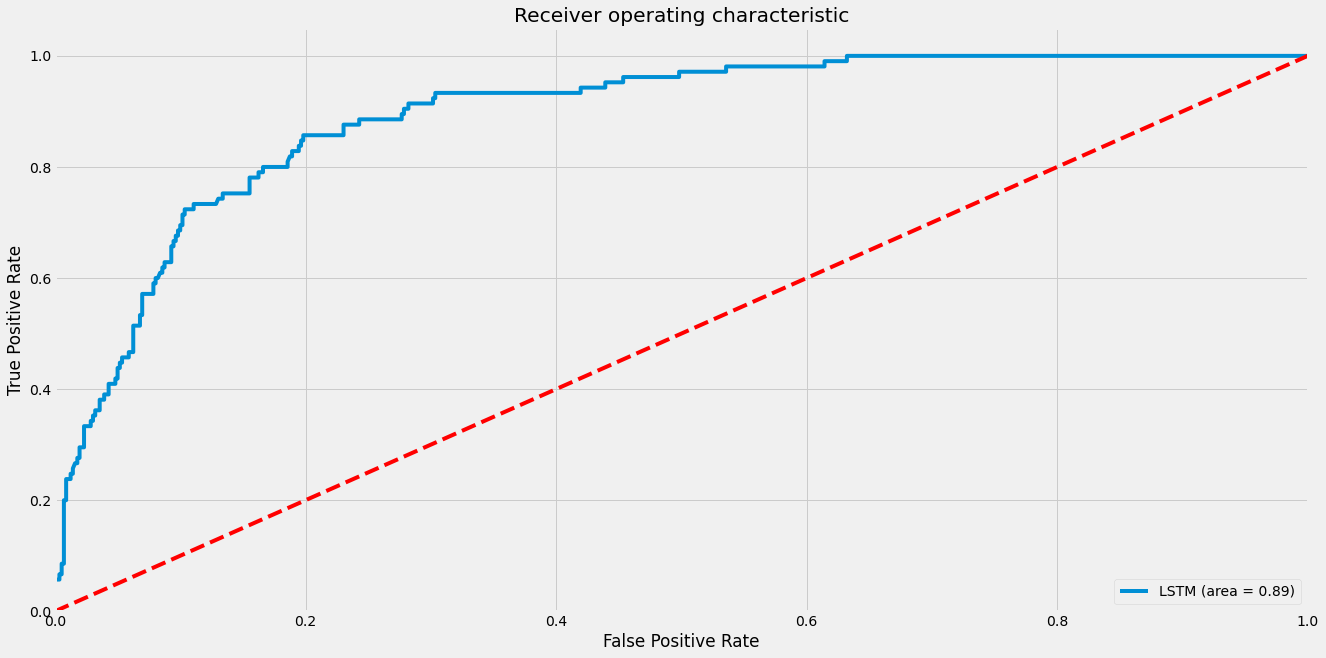

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

nn_roc_auc = roc_auc_score(y_test, y_pred_ts)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ts)
plt.figure()
plt.plot(fpr, tpr, label="LSTM (area = %0.2f)" % nn_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

In [60]:
max_mult = {}
F1 = {}

for i in np.arange(0, 1, 0.05):
    y_class_ts = [1 if y >= i else 0 for y in y_pred_ts]
    y_class_ts_N = [1 if y < i else 0 for y in y_pred_ts]

    print("Threshold = " + str(i) + " - Acc:", accuracy_score(y_test, y_class_ts))
    print("Threshold = " + str(i) + " - Prec:", precision_score(y_test, y_class_ts))
    print("Threshold = " + str(i) + " - Prec_N:", precision_score(y_test, y_class_ts_N))
    print("Threshold = " + str(i) + " - Rec:", recall_score(y_test, y_class_ts))
    print()

    max_mult[str(i)] = precision_score(y_test, y_class_ts) * recall_score(
        y_test, y_class_ts
    )
    F1[str(i)] = (
        2
        * (precision_score(y_test, y_class_ts) * recall_score(y_test, y_class_ts))
        / (precision_score(y_test, y_class_ts) + recall_score(y_test, y_class_ts))
    )

print(max_mult)
print()
print(F1)

Threshold = 0.0 - Acc: 0.15789473684210525
Threshold = 0.0 - Prec: 0.15789473684210525
Threshold = 0.0 - Prec_N: 0.0
Threshold = 0.0 - Rec: 1.0

Threshold = 0.05 - Acc: 0.3142857142857143
Threshold = 0.05 - Prec: 0.18716577540106952
Threshold = 0.05 - Prec_N: 0.0
Threshold = 0.05 - Rec: 1.0

Threshold = 0.1 - Acc: 0.40902255639097745
Threshold = 0.1 - Prec: 0.21084337349397592
Threshold = 0.1 - Prec_N: 0.0
Threshold = 0.1 - Rec: 1.0

Threshold = 0.15000000000000002 - Acc: 0.5263157894736842
Threshold = 0.15000000000000002 - Prec: 0.24759615384615385
Threshold = 0.15000000000000002 - Prec_N: 0.008032128514056224
Threshold = 0.15000000000000002 - Rec: 0.9809523809523809

Threshold = 0.2 - Acc: 0.5894736842105263
Threshold = 0.2 - Prec: 0.27297297297297296
Threshold = 0.2 - Prec_N: 0.013559322033898305
Threshold = 0.2 - Rec: 0.9619047619047619

Threshold = 0.25 - Acc: 0.6631578947368421
Threshold = 0.25 - Prec: 0.3111111111111111
Threshold = 0.25 - Prec_N: 0.02
Threshold = 0.25 - Rec: 0.9

C:\Users\Guilherme Lupatelli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Guilherme Lupatelli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Guilherme Lupatelli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Guilherme Lupatelli\anaconda3\lib\site-packages\sklearn\metrics\_cl

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

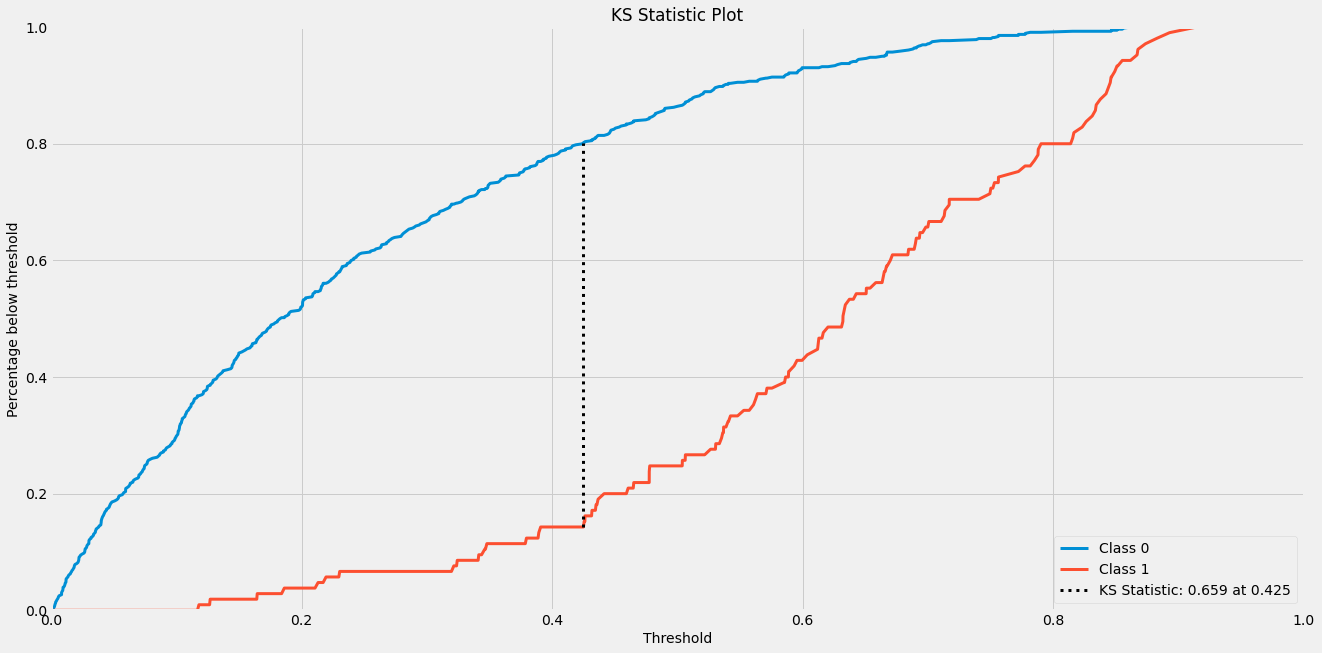

In [61]:
from scikitplot.metrics import plot_ks_statistic
from scikitplot.helpers import binary_ks_curve

plot_ks_statistic(y_test,  model.predict_proba(X_test))

- AUC for test sample is 0.89 which is pretty good result
- For a threshold of 0.5: Accuracy = 0.84 / Precision = 0.5 / Recall = 0.75
- KS significantly high 0.659 at threshold of 0.425